In [1]:
import time
from PIL import Image
import numpy as np


In [2]:
from keras import backend
from keras.models import Model
from keras.applications.vgg16 import VGG16


Using TensorFlow backend.


In [3]:
from scipy.optimize import fmin_l_bfgs_b
from scipy.misc import imsave

In [8]:
height = 512
width = 512

In [12]:
def get_image(img_path):
    img = Image.open(img_path)
    img = img.resize((height,width))
    return img

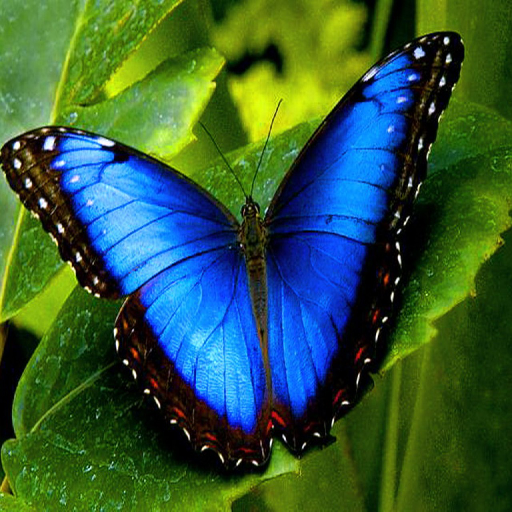

In [13]:
content_image_path = "../../MLData/styles/butterfly-photo.jpg"
content_image = get_image(content_image_path)
content_image

In [14]:
content_image.width

512

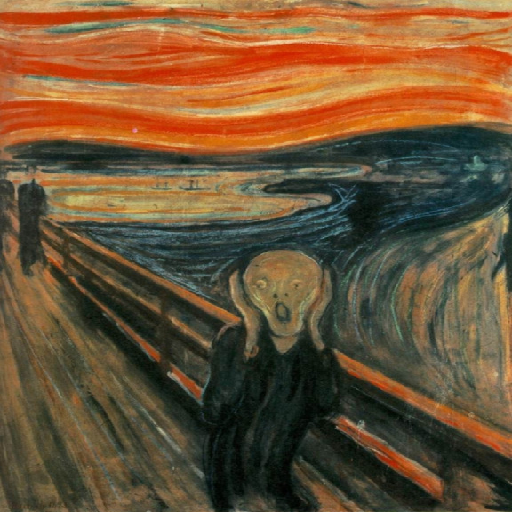

In [15]:
style_image_path = "../../MLData/styles/skrik.jpg"
style_image = get_image(style_image_path)
style_image

In [17]:
content_array = np.asarray(content_image, dtype = "float32")
content_array = np.expand_dims(content_array, axis=0)
print(content_array.shape)

style_array = np.asarray(style_image, dtype="float32")
style_array = np.expand_dims(style_array,axis=0)
print(style_array.shape)

(1, 512, 512, 3)
(1, 512, 512, 3)


In [18]:
# subtract mean rgb values as in image net traing set
# flip the ordering from RGB to BGR
content_array[:, :, :, 0] -= 103.939
content_array[:, :, :, 1] -= 116.779
content_array[:, :, :, 1] -= 123.68
content_array = content_array[:, :, :, ::-1]

style_array[:, :, :, 0] -= 103.939 
style_array[:, :, :, 1] -= 116.779
style_array[:, :, :, 2] -= 123.68
style_array = style_array[:, :, :, ::-1]

In [21]:
# Define Tensorflow graph content and images are placed as variables while combintion uses placeholder to store combination image
content_image = backend.variable(content_array)
style_image = backend.variable(style_array)
combination_image = backend.placeholder((1, height, width, 3))

In [22]:
input_tensor = backend.concatenate([content_image,
                                   style_image,
                                   combination_image])